In [2]:
import os
import cv2
path = 'train1/'
print(len(os.listdir(path)))

25000


In [8]:
def write(old_path, new_path):
    img = cv2.imread(old_path)
    cv2.imwrite(new_path, img)

path = 'train1/'
new = 'train/cat'
new1 = 'valid/cat'

lim = 0
c=0
for filename in os.listdir(path):
    if filename[0]=='c':
        try:
            old_path = path + '/' + filename
            if lim < 9999:
                new_path = new + '/' + filename
                write(old_path, new_path)
            else:
                if c<2499:
                    new_path1 = new1 + '/' + filename
                    write(old_path, new_path1)
                c+=1
            lim = lim+1
        except:
            pass

#follow for cats

In [9]:
import cv2
import time
import keras
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import TensorBoard

Using TensorFlow backend.
/home/rishi/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/rishi/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/rishi/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/rishi/.local/lib/python3.7/site-packages/tensorflow/python/fra

Defining path to training and validation images:

In [13]:
train_path = 'train'
valid_path = 'valid'

Model architecture:

In [14]:
model = Sequential()
model.add(Convolution2D(16, 5, 5, activation='relu', input_shape=(28,28, 3)))
model.add(MaxPooling2D(2, 2))

model.add(Convolution2D(32, 5, 5, activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dense(1000, activation='relu'))

model.add(Dense(2, activation='softmax'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (5, 5), activation="relu", input_shape=(28, 28, 3...)`
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), activation="relu")`
  """


Compiling the model:

In [15]:
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

W0814 11:53:26.592836 140702762997568 deprecation_wrapper.py:119] From /home/rishi/.local/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0814 11:53:26.612151 140702762997568 deprecation_wrapper.py:119] From /home/rishi/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0814 11:53:26.616080 140702762997568 deprecation.py:323] From /home/rishi/.local/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


To view the architecture:

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 24, 24, 16)        1216      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 32)          12832     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1000)              513000    
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 2002      
Total para

Image augmentation:

In [17]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(28,28),
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        valid_path,
        target_size=(28,28),
        batch_size=32,
        class_mode='categorical')

Found 19998 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.


For tensorboard visualisation:

In [18]:
NAME = "Cats-vs-dogs-CNN"
tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))
keras.backend.get_session().run(tf.global_variables_initializer())

W0814 11:54:45.880852 140702762997568 deprecation_wrapper.py:119] From /home/rishi/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.



For training the model:

In [19]:
model.fit_generator(
        train_generator,
        samples_per_epoch=19998,
        nb_epoch=10,
        validation_data=validation_generator,
        nb_val_samples=4998,
        callbacks=[tensorboard])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., callbacks=[<tensorfl..., steps_per_epoch=624, epochs=10, validation_steps=4998)`
  import sys


Epoch 1/10
624/624 [==============================] - 167s 268ms/step - loss: 0.6459 - acc: 0.6230 - val_loss: 0.5842 - val_acc: 0.6860
Epoch 2/10
624/624 [==============================] - 166s 265ms/step - loss: 0.5902 - acc: 0.6882 - val_loss: 0.6029 - val_acc: 0.6878
Epoch 3/10
624/624 [==============================] - 167s 268ms/step - loss: 0.5645 - acc: 0.7095 - val_loss: 0.5621 - val_acc: 0.7032
Epoch 4/10
624/624 [==============================] - 167s 267ms/step - loss: 0.5419 - acc: 0.7247 - val_loss: 0.5358 - val_acc: 0.7330
Epoch 5/10
624/624 [==============================] - 168s 270ms/step - loss: 0.5269 - acc: 0.7392 - val_loss: 0.5508 - val_acc: 0.7242
Epoch 6/10
624/624 [==============================] - 165s 264ms/step - loss: 0.5091 - acc: 0.7539 - val_loss: 0.5250 - val_acc: 0.7409
Epoch 7/10
624/624 [==============================] - 167s 268ms/step - loss: 0.4941 - acc: 0.7610 - val_loss: 0.5824 - val_acc: 0.7195
Epoch 8/10
624/624 [============================

Saving the model file

In [20]:
model.save('model1.h5')

In [21]:
from keras.models import load_model
import cv2
import numpy as np
import matplotlib.pyplot as plt

Loading the model

In [22]:
model = load_model('model1.h5')

Reading from the model

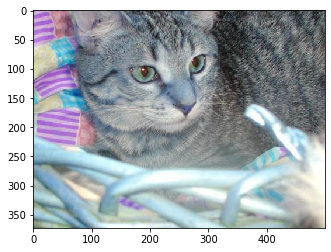

In [38]:
img = cv2.imread('test1/228.jpg')
plt.imshow(img)

Prediction from the model

In [39]:
def predict(img):
    ar = np.array(img).reshape((28,28,3))
    ar = np.expand_dims(ar, axis=0)
    prediction = model.predict(ar)[0]
    if prediction[0] == 1:
        return "cat"
    else:
        return "dog"

In [40]:
img = cv2.resize(img, (28,28))
res = predict(img)
print(res)

dog


Loop to test for affirmation of classfication

In [42]:
i = 0
for filename in os.listdir('test1'):
    if(i < 20):
        i=i+1
        img = cv2.imread('test1/' + filename)
        img = cv2.resize(img, (28,28))
        res = predict(img)
        print(res)
    else:
        break
    

dog
dog
cat
dog
dog
dog
dog
cat
dog
dog
dog
dog
cat
dog
dog
dog
dog
dog
dog
dog
